## Customer Demographics Mini Project

### Data Import

In [37]:
import pandas as pd
import numpy as np

df_cust = pd.read_csv('./twm_customer.csv', sep =';')

display(df_cust.head())

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [10]:
df_cust.shape

(747, 15)

In [11]:
df_cust.size

11205

In [12]:
df_cust.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

In [13]:
df_cust['city_name'].value_counts().head(20)

New York City                               98
Los Angeles                                 84
Chicago                                     56
Houston                                     39
San Francisco                               23
Philadelphia                                17
Portland                                    16
Indianapolis                                16
Milwaukee                                   15
Dallas                                      13
Sacramento                                  13
Phoenix                                     13
Honolulu                                    13
San Diego                                   11
Austin                                      11
Anaheim                                     10
Kansas City                                 10
Long Beach                                  10
Memphis                                      9
Nashville                                    9
Name: city_name, dtype: int64

In [14]:
df_cust['state_code'].value_counts().head(20)

CA      177
NY      107
TX       83
IL       56
AZ       24
OH       23
PA       21
TN       18
MO       17
FL       16
OK       16
OR       16
IN       16
WI       15
MN       13
HI       13
KY       13
NJ       12
CO       11
NC        9
Name: state_code, dtype: int64

In [32]:
df_cust[['marital_status', 'age']].sort_values(by=['marital_status'])

,marital_status,age
746,1,18
540,1,26
543,1,17
545,1,18
546,1,48
...,...,...
588,4,70
90,4,41
191,4,30
206,4,23


### Income

In [33]:
# df_cust.sort_values(by='income', ascending=False)
# income ranges from 0 to 144k

### Age

In [38]:
# df_cust.sort_values(by='age', ascending=False)
# age ranges from 13 to 89 years old

In [17]:
# # feature engineering: binning
# df_cust['age_group'] = pd.cut(x=df_cust['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 90], labels=['10s','20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])

In [18]:
# df_cust['age_group'].value_counts(sort=False).plot(kind='bar')

### Years with Bank

In [39]:
# df_cust.sort_values(by='years_with_bank', ascending=False)
# years with bank ranges from 0 to 9 years

### Number of Children

In [40]:
# df_cust.sort_values(by='nbr_children', ascending=False)
# Number of children ranges from 0 to 5

In [3]:
# # binning not necessary, ranges only from 0 to 5 number of children
# df_cust["nbr_children"].value_counts(sort=True).plot(kind='bar')

## Data Cleaning

In [168]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [169]:
df_cust.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

There are no missing values in the customer information dataset.

In [170]:
duplicate_df_cust = df_cust[df_cust.duplicated()]


print("number of duplicate rows: ", duplicate_df_cust.shape)

number of duplicate rows:  (0, 15)


In [171]:
# check duplicates
df_cust.duplicated().sum()

0

There are no duplicate values in the customer information dataset.

In [172]:
df_cust.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [173]:
df_cust["gender"] = df_cust["gender"].str.strip()
df_cust["gender"].replace({"M" : 1, "F" : 0}, inplace=True)

In [163]:
df_cust.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,1,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,1,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,0,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,0,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,0,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


Text(0.5, 1.0, 'Correlation')

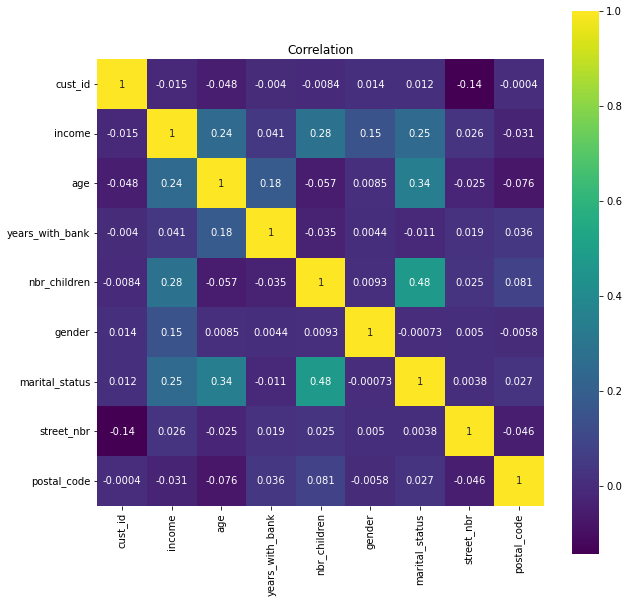

In [128]:
corr = df_cust.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation')

### Scaling Dataframe 

In [42]:
from sklearn.preprocessing import MinMaxScaler

df_cust_filtered = df_cust[["income", "age", "nbr_children", "marital_status"]]

In [43]:
df_cust_filtered.head()

,income,age,nbr_children,marital_status
0,26150,46,1,2
1,6605,71,0,2
2,18548,38,0,1
3,47668,54,0,1
4,44554,59,2,4


In [44]:
scaler = MinMaxScaler()
df_cust_rescaled = scaler.fit_transform(df_cust_filtered)

In [45]:
print(df_cust_rescaled)

[[0.18139945 0.43421053 0.2        0.33333333]
 [0.0458181  0.76315789 0.         0.33333333]
 [0.12866527 0.32894737 0.         0.        ]
 ...
 [0.42523082 0.48684211 0.4        0.33333333]
 [0.10474691 0.31578947 0.         0.33333333]
 [0.12399675 0.06578947 0.         0.        ]]


## PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df = pca.fit_transform(df_cust_rescaled)

[0.52455238 0.79758267 0.92274441 1.        ]


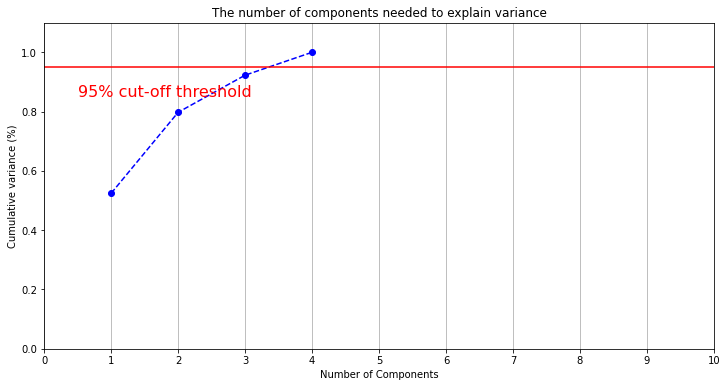

In [47]:
pca = PCA().fit(df_cust_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [158]:
print(f"The original df shape is: {df_cust_rescaled.shape}")

The original df shape is: (747, 4)


In [159]:
print(f"The reduced df shape is: {pca_df.shape}")

The reduced df shape is: (747, 4)


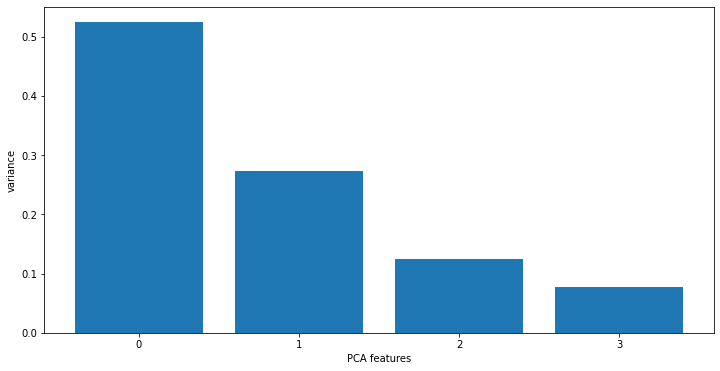

In [161]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

### Clustering

In [67]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()